### Imports

In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Reading data

In [3]:
data_path = "../data/lab_2/car_crashes.xlsx"

In [34]:
df = pd.read_excel(data_path)
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,True,False,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,A-4996,MapQuest,201.0,2,2016-08-01 11:35:41,2016-08-01 12:05:41,0.00,Accident on Cold Springs Rd at Middletown Rd.,Cold Springs Rd,R,...,False,False,False,False,False,False,False,False,Day,Day
4996,A-4997,MapQuest,201.0,2,2016-08-01 11:41:23,2016-08-01 12:26:23,0.00,Accident on Travis Blvd at Holiday Ln.,Travis Blvd,R,...,False,False,False,False,False,False,True,False,Day,Day
4997,A-4998,MapQuest,201.0,2,2016-08-01 11:57:27,2016-08-01 12:42:27,0.00,Accident on River Rd at Orchard Rd.,River Rd,L,...,False,False,False,False,False,False,False,False,Day,Day
4998,A-4999,MapQuest,201.0,2,2016-08-01 12:00:54,2016-08-01 12:30:54,0.00,Accident on Marconi Ave at Bell St.,Bell St,R,...,False,False,False,False,False,False,False,False,Day,Day


In [17]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

### Data types:
##### Nominal:
ID, Source, Description, Street, City, State, Zipcode, Wind_Direction, Weather_Condition
##### Binary:
Side, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight
##### Ordinal:
Severity
##### Discrete:
TMC
##### Сontinuous:
Start_Time, End_Time, Distance(mi), Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in)

### Visibility

In [43]:
visibility = df.loc[:, "Visibility(mi)"].dropna()
visibility.describe()

count    4958.000000
mean        9.465611
std         1.886629
min         0.200000
25%        10.000000
50%        10.000000
75%        10.000000
max        40.000000
Name: Visibility(mi), dtype: float64

<AxesSubplot:>

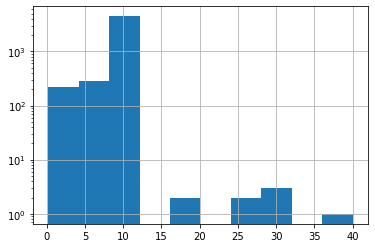

In [47]:
visibility.hist(log=True)

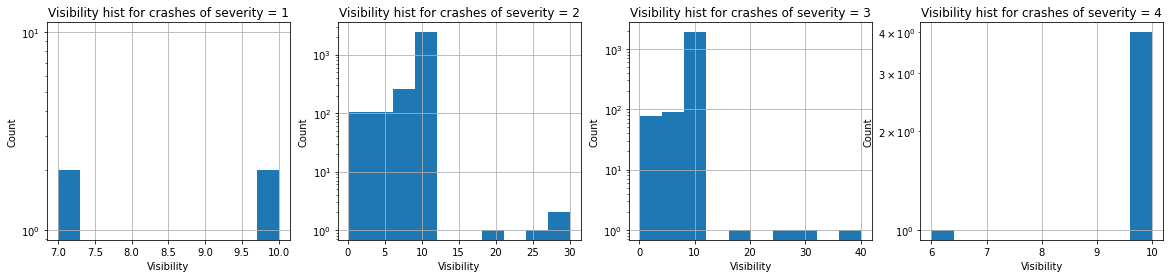

In [104]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(20,4)
for i in range(4):
    axs[i].set_xlabel("Visibility")
    axs[i].set_ylabel("Count")
    axs[i].set_title(f"Visibility hist for crashes of severity = {i + 1}")
    df.loc[df.Severity == i + 1,"Visibility(mi)"].dropna().hist(ax=axs[i], log=True)

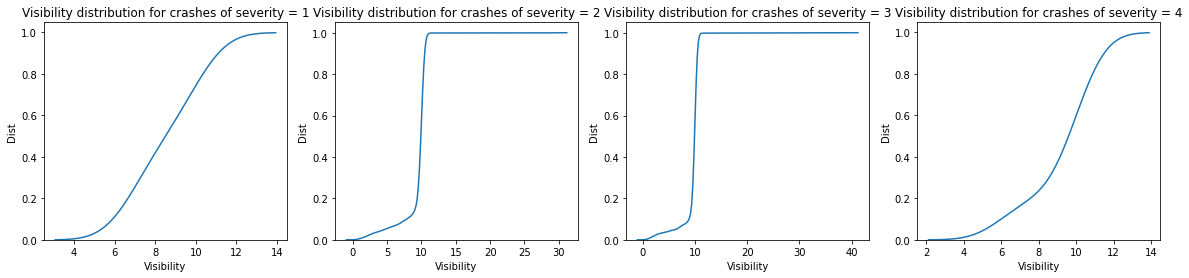

In [105]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(20,4)
for i in range(4):
    axs[i].set_xlabel("Visibility")
    axs[i].set_ylabel("Dist")
    axs[i].set_title(f"Visibility distribution for crashes of severity = {i + 1}")
    sns.kdeplot(df.loc[df.Severity == i + 1,"Visibility(mi)"].dropna(),
                ax=axs[i], cumulative=True)

### Temperature

In [106]:
temperature = df.loc[:, "Temperature(F)"]
temperature.describe()

count    4978.000000
mean       69.849900
std        18.308741
min         3.900000
25%        60.800000
50%        71.100000
75%        82.400000
max       106.000000
Name: Temperature(F), dtype: float64

##### Variation series

In [116]:
var_series = sorted(temperature)
var_series[:15]

[3.9,
 5.0,
 6.1,
 7.0,
 7.0,
 7.0,
 7.5,
 7.5,
 8.1,
 9.0,
 10.0,
 10.0,
 10.4,
 10.9,
 10.9]

##### Statistical series

In [120]:
stat_series = temperature.value_counts().sort_index()
stat_series

3.9       1
5.0       1
6.1       1
7.0       3
7.5       2
         ..
102.6     1
102.9    14
103.6     1
104.0    24
106.0     2
Name: Temperature(F), Length: 238, dtype: int64

##### Grouped statistical series

<AxesSubplot:>

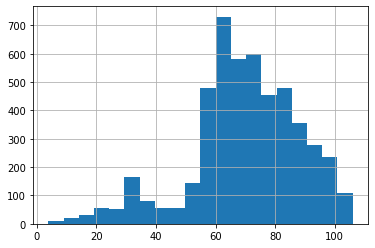

In [124]:
temperature.hist(bins=20)

### Highest number of accidents

In [137]:
most_accident_cities = df.City.value_counts(sort=True)[:5]
most_accident_cities

Sacramento    555
Dayton        321
San Jose      251
Columbus      170
Oakland       158
Name: City, dtype: int64

### Road distance distributions in listed cities

/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


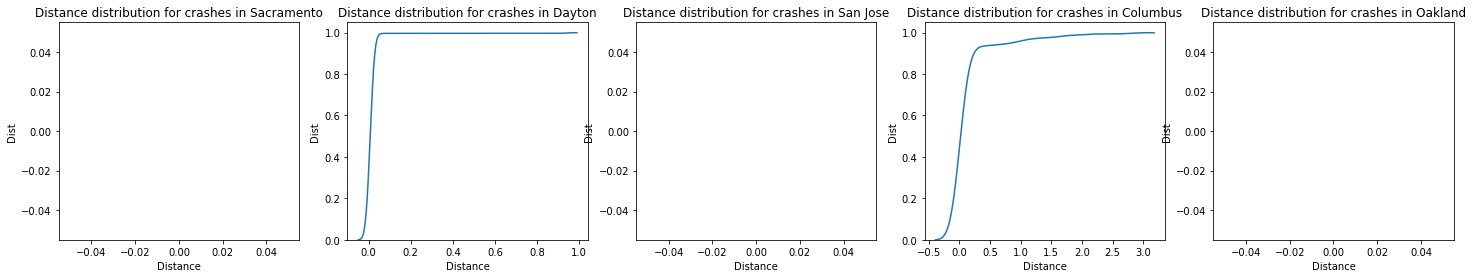

In [139]:
fig, axs = plt.subplots(1, 5)
fig.set_size_inches(25,4)
for i in range(5):
    axs[i].set_xlabel("Distance")
    axs[i].set_ylabel("Dist")
    axs[i].set_title(f"Distance distribution for crashes in {most_accident_cities.index[i]}")
    sns.kdeplot(df.loc[df.City == most_accident_cities.index[i], "Distance(mi)"],
                ax=axs[i], cumulative=True)